# Heart Attack Prediction 

# Importing Libraries

In [5]:
# import libraries
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn. model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import tree
import warnings
from scipy.stats import zscore
from scipy.stats import chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.pipeline import make_pipeline 
from kneed import KneeLocator

## Load Dataset

In [6]:
# load dataset

df = pd.read_csv('heart.csv')

#### we loaded the heart dataset into a Pandas data frame using the read csv function.

 ## Data Exploration 

### Statistical Summary of the Dataset

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.536390
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.285822
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.260000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,0.710000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,0.810000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,0.900000


### The above statistical description shows that the minimum age of the patients in the dataset is 29 years and the maximum age is 77 years and the average age is 54 years. 

### Attributes Data Types

In [8]:
# show attribute data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 112.2 KB


 ### Graphs

### we chose Histograms because :  visually represent data distribution, aiding in identifying central tendencies, detecting skewness and outliers, and assisting in data preprocessing for analysis. They are crucial for effectively showcasing data characteristics.


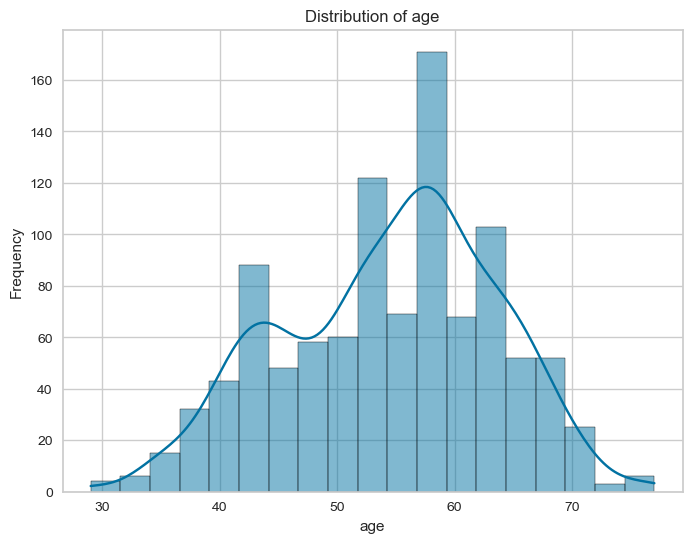

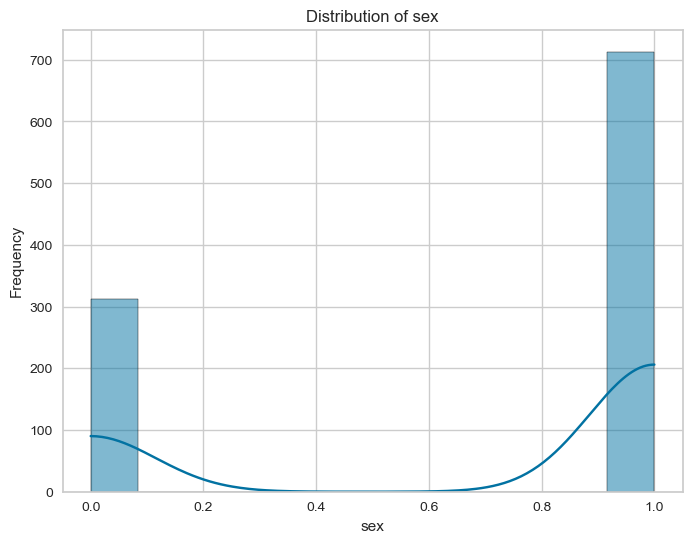

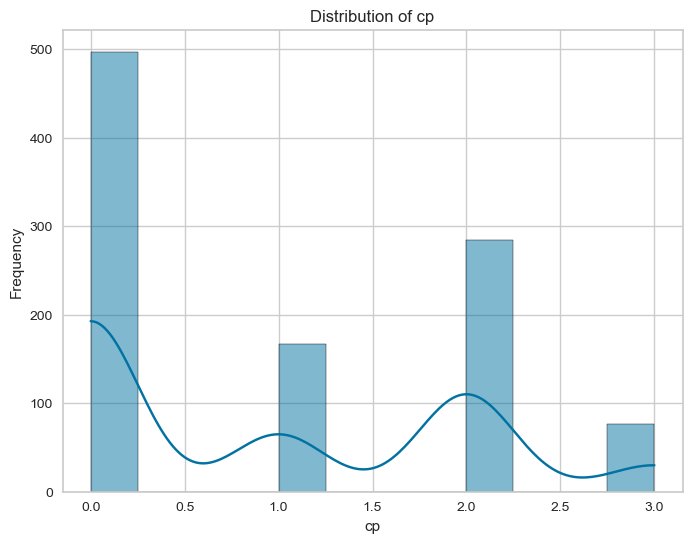

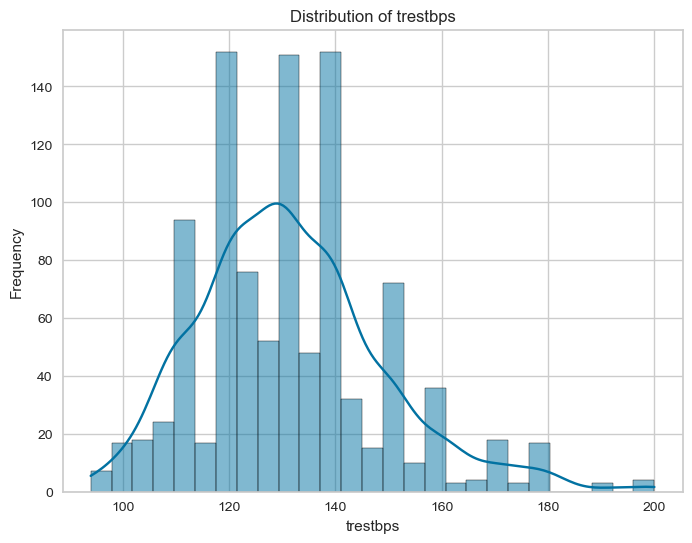

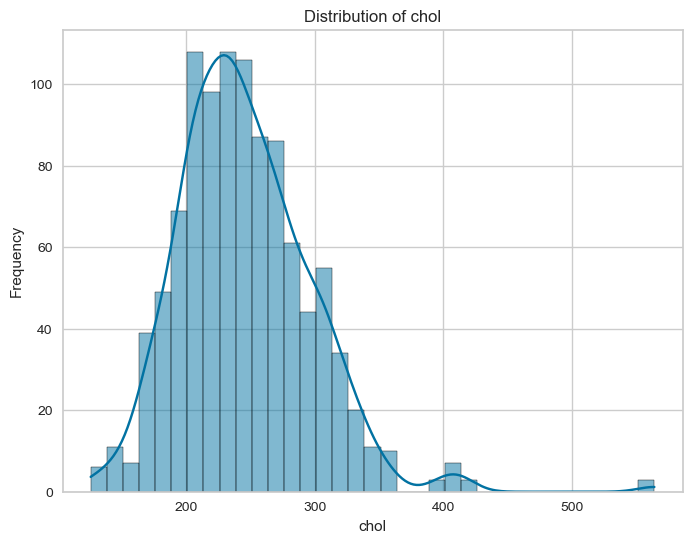

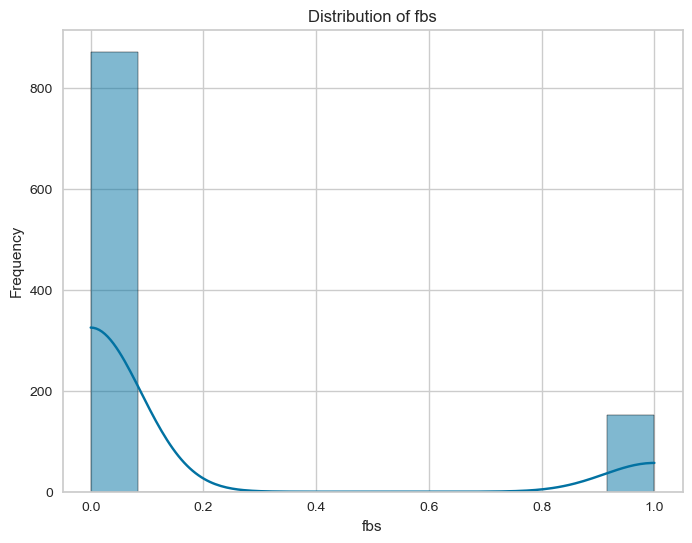

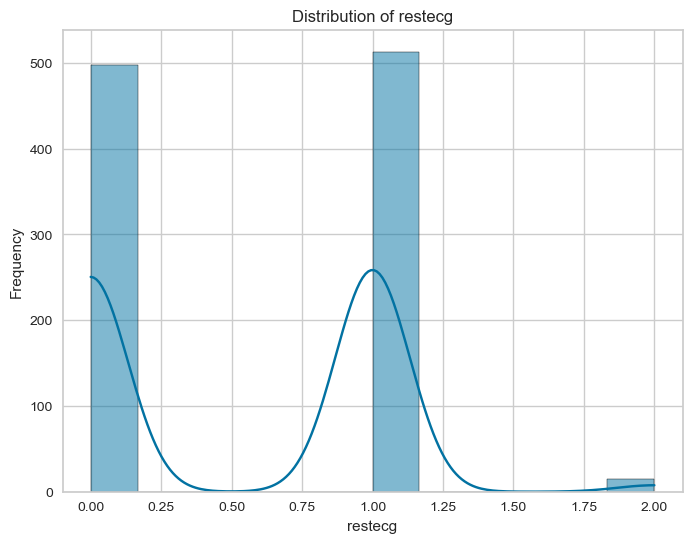

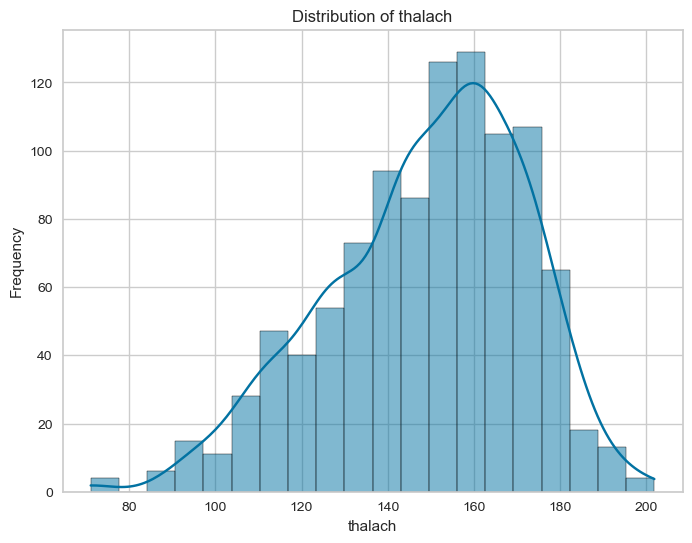

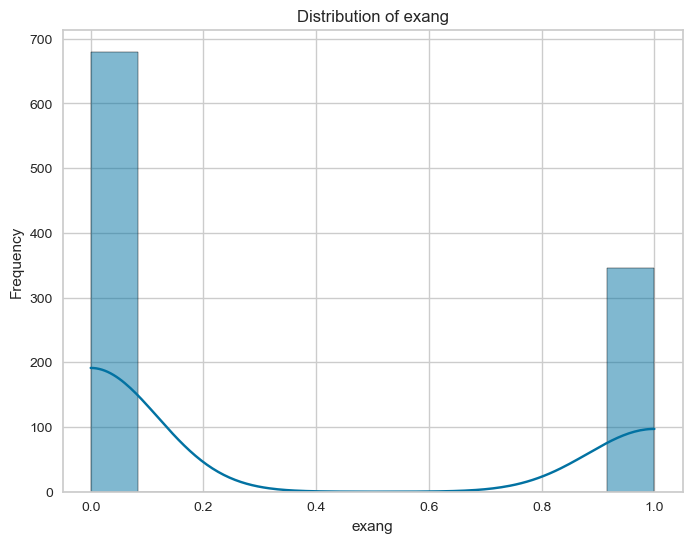

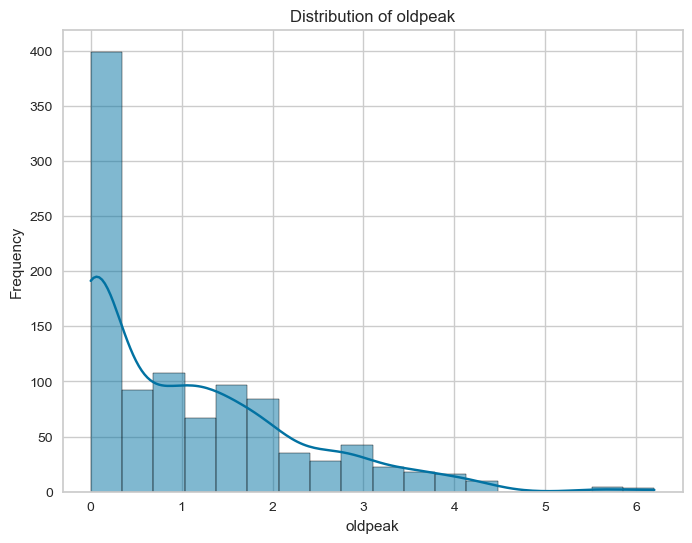

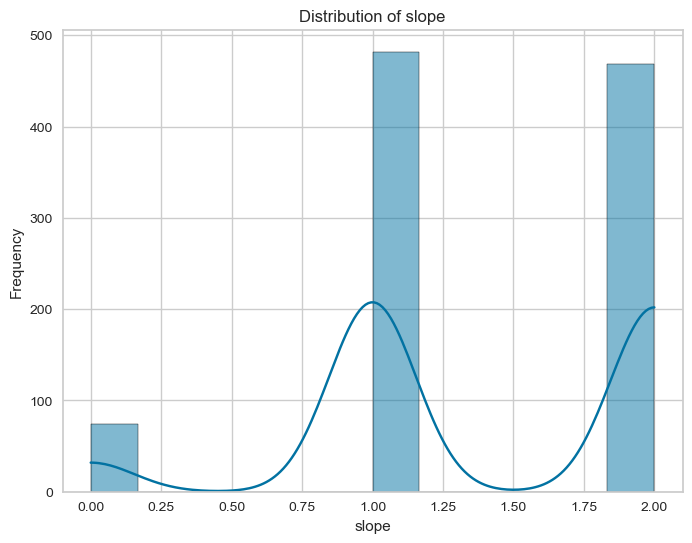

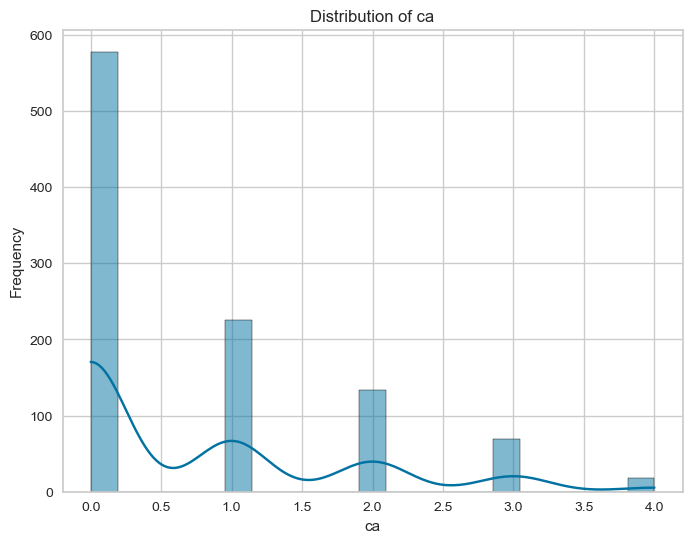

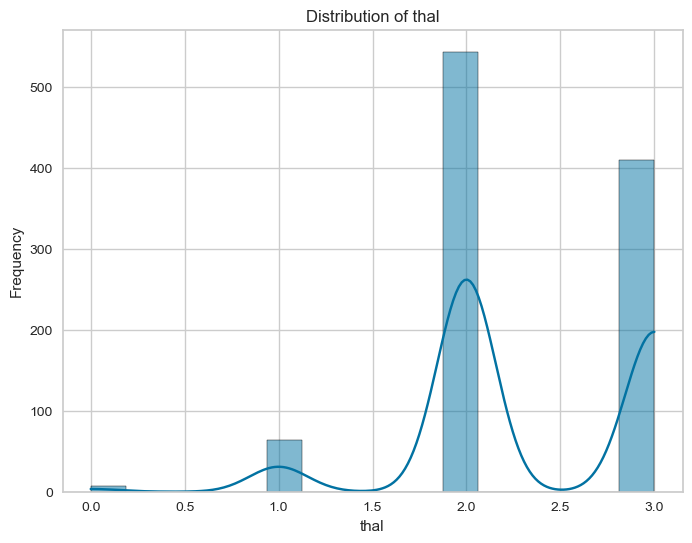

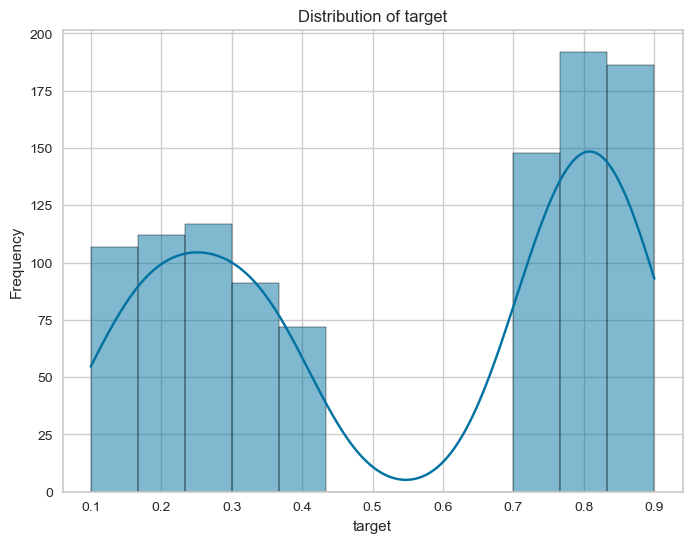

In [9]:
for column in df.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

## Pie Chart

We chose pie chart : to show our data because of: Pie charts visually represent categorical data, displaying the relative proportions of different categories. They simplify complex data, facilitate comparison, and effectively communicate information. ‎<This message was edited>

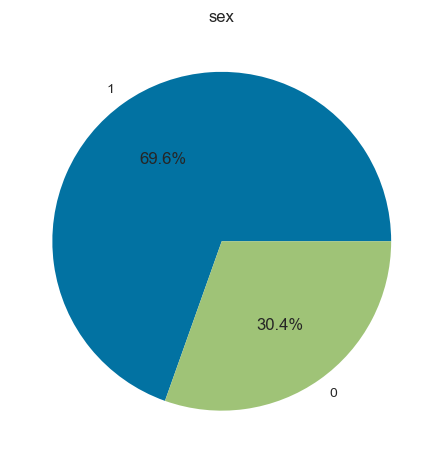

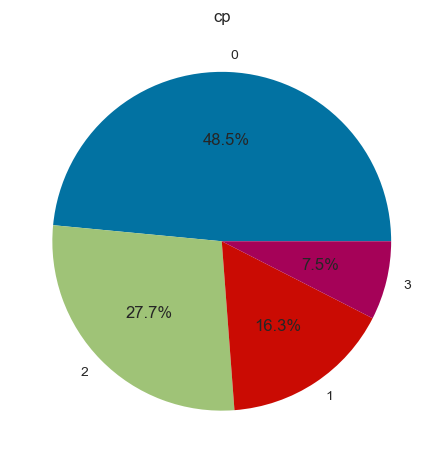

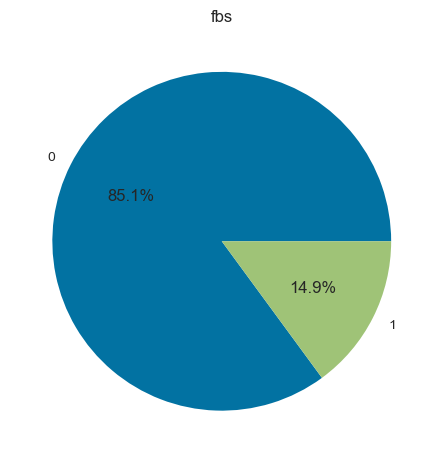

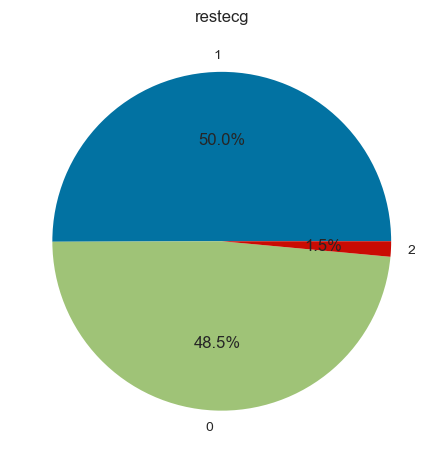

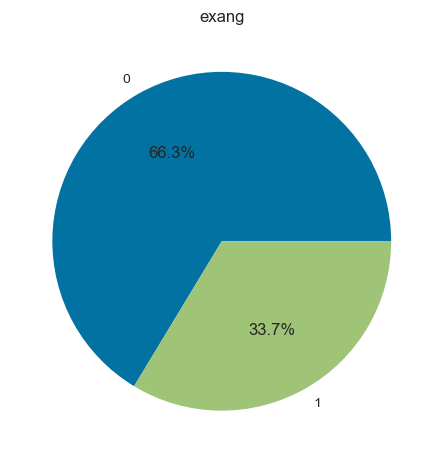

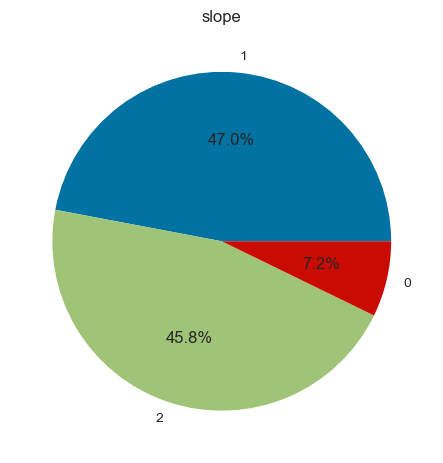

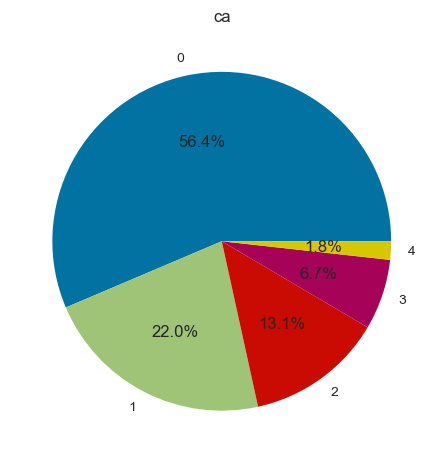

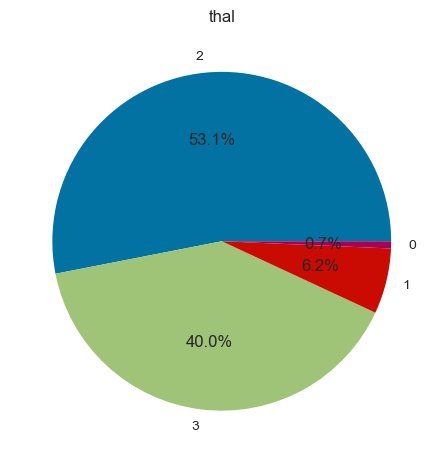

In [10]:
# Columns to exclude from pie chart generation
exclude_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']

# Generate pie charts for each column (excluding specified columns)
for col in df.columns:
    if col not in exclude_columns:
        counts = df[col].value_counts()
        plt.figure()
        plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
        plt.title(col)

# Display the charts
plt.show()

### The above Pie diagram shows that almost 70% of the patients in the dataset are female and 30% are male.

Our data need to comparison, display ranking or order, show distribution, support data comparison, facilitate effective communication, highlight deviations or outliers, and aid in decision-making processes. 
And That’s why we use bar chart


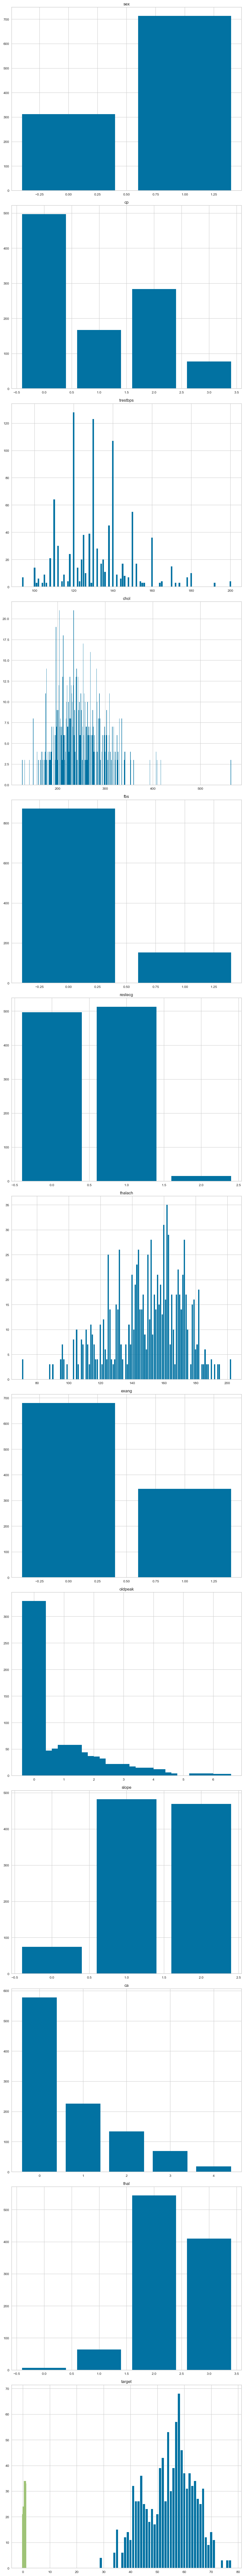

In [11]:
# Create subplots for each column
fig, axs = plt.subplots(len(df.columns)-1, 1, figsize=(10, 8*(len(df.columns)-1)))

# Generate bar charts for each column
for i, col in enumerate(df.columns):
    if col != 'Attribute name':
        counts = df[col].value_counts()
        axs[i-1].bar(counts.index, counts.values)
        axs[i-1].set_title(col)

# Adjust spacing between subplots
plt.tight_layout()

# Display the charts
plt.show()


### And here are some additional charts that we have noticed represent the relationship between certain attributes.

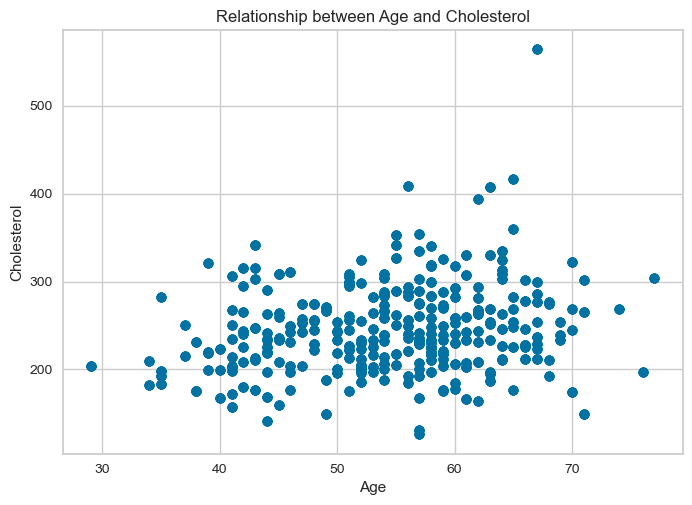

In [12]:
plt.scatter(df['age'], df['chol'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Relationship between Age and Cholesterol')
plt.show()

### Here we observe that the incidence rate of heart disease is higher among women than men:

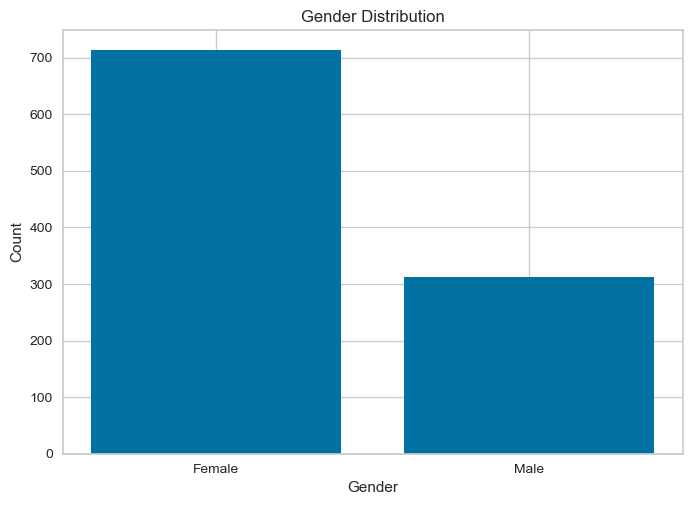

In [13]:
gender_counts = df['sex'].value_counts()
gender_labels = ['Female', 'Male']
plt.bar(gender_labels, gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

### The mean:  often referred to as the average, is a measure of central tendency in statistics. It is used to describe the typical value in a set of numbers. The above histogram shows that female patients is greater than male patients in the dataset.

In [14]:
col1='age'
data_col1=df[col1]
mean=np.mean(data_col1)
print("Mean of column age:",mean)
col10='cp'
data_col10=df[col10]
mean=np.mean(data_col10)
print("Mean of column cp:",mean)
col3='chol'
data_col3=df[col3]
mean=np.mean(data_col3)
print("Mean of column chol:",mean)
col5='oldpeak'
data_col5=df[col5]
mean=np.mean(data_col5)
print("Mean of column oldpeak:",mean)
col7='ca'
data_col7=df[col7]
mean=np.mean(data_col7)
print("Mean of column ca:",mean)


Mean of column age: 54.43414634146342
Mean of column cp: 0.9424390243902439
Mean of column chol: 246.0
Mean of column oldpeak: 1.0715121951219515
Mean of column ca: 0.7541463414634146


### Variance:  measures how much the values in a dataset differ from the mean. It's the average of the squared differences between each value and the mean. Higher variance means more spread-out values, while lower variance means values are closer together.


In [15]:
col1='age'
data_col1=df[col1]
var=np.var(data_col1)
print("Variance of column age:",var)
col10='cp'
data_col10=df[col10]
var=np.var(data_col10)
print("Variance of column cp:",var)
col3='chol'
data_col3=df[col3]
var=np.var(data_col3)
print("Variance of column chol:",var)
col5='oldpeak'
data_col5=df[col5]
var=np.var(data_col5)
print("Variance of column oldpeak:",var)
col7='ca'
data_col7=df[col7]
var=np.var(data_col7)
print("Variance of column ca:",var)


Variance of column age: 82.22615110053546
Variance of column cp: 1.059125758477081
Variance of column chol: 2659.190243902439
Variance of column oldpeak: 1.3794030791195644
Variance of column ca: 1.0615071980963766


The mode :is the most frequently occurring value in a dataset and helps identify typical values and handle skewed distributions. It is useful for categorical or discrete data.




In [16]:
# Calculate mode for each column
columns = ['age', 'cp', 'chol', 'oldpeak', 'ca']
for col in columns:
    mode_val = df[col].mode()[0]
    print(f"Mode of column {col}: {mode_val}")


Mode of column age: 58
Mode of column cp: 0
Mode of column chol: 204
Mode of column oldpeak: 0.0
Mode of column ca: 0


The median: is the middle value in a dataset when arranged in ascending order. If the dataset has an odd number of values, it's the middle number. If the dataset has an even number of values, it's the average of the two middle numbers.



In [17]:
# Calculate median for each column
columns = ['age', 'cp', 'chol', 'oldpeak', 'ca']
for col in columns:
    median_val = df[col].median()
    print(f"Median of column {col}: {median_val}")

Median of column age: 56.0
Median of column cp: 1.0
Median of column chol: 240.0
Median of column oldpeak: 0.8
Median of column ca: 0.0


The midrange is :the average of the maximum and minimum values and provides a quick assessment of spread and supports dataset comparisons, particularly for datasets with a small range.


In [18]:
# Calculate midrange for each column
columns = ['age', 'cp', 'chol', 'oldpeak', 'ca']
for col in columns:
    min_val = df[col].min()
    max_val = df[col].max()
    midrange = (min_val + max_val) / 2
    print(f"Midrange of column {col}: {midrange}")

Midrange of column age: 53.0
Midrange of column cp: 1.5
Midrange of column chol: 345.0
Midrange of column oldpeak: 3.1
Midrange of column ca: 2.0


# Data Preprocessing


### In the data preprocessing phase, we will apply methods for preparing the dataset for classification anc clustering. These preprocessing methods include checking and treating missing values, normalization and discritization.

## Checking for missing values

there is no missing data : 

In [21]:
# show missing values
missing_vlues = df.isnull().sum()
display(missing_vlues)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Results show that there is no missing values in the dataset.

## Detecting outlier by using mean  :

In [22]:
age_column = df['age']
mean_age= age_column.mean()
differences_from_mean= abs(age_column - mean_age)

max_difference_index =differences_from_mean.idxmax()

df_no_outlier= df.drop(max_difference_index)
print("\nDataFrame after removing the row with the largest difference from the mean :")
df_no_outlier


DataFrame after removing the row with the largest difference from the mean :


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0.16
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,0.73
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,0.85
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0.15


### In the above code, we removed outliers from the dataset and displayed the dataset after outlier removal.

## Detecting outliers by using z_score:

In [23]:
# Calculate z-scores for age column
df['age_zscore'] = zscore(df['age'])

# Find the index of the row with the maximum absolute z-score
max_zscore_index = df['age_zscore'].abs().idxmax()

# Drop the row with the maximum z-score
df_no_outlier = df.drop(max_zscore_index)

# Drop the z-score column since it's not needed anymore
df_no_outlier = df_no_outlier.drop('age_zscore', axis=1)

print("\nDataFrame after removing the row with the largest z-score:")
print(df_no_outlier)


DataFrame after removing the row with the largest z-score:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1018   41    1   0       110   172    0        0      158      0      0.0   
1019   47    1   0       112   204    0        1      143      0      0.1   
1020   59    1   1       140   221    0        1      164      1      0.0   
1022   47    1   0       110   275    0        0      118      1      1.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca

## Normalization 

### Normalization is a preprocessing step in machine learning to scale the features of a dataset to a standard range. The normalization decreases the training time of the machine learning models and increases the accuracy. We use the Standard Scaler class to normalize the numeric attributes of the dataset.

In [24]:
# Select the columns to be normalized
columns_to_normalize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a StandardScaler object
scaler = StandardScaler()

# Normalize the selected columns using Z-score method
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Print the normalized data
print("Normalized Data:")
print(df)


Normalized Data:
           age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0    -0.263511    1   0 -0.382498 -0.650279    0        1  0.817855      0   
1    -0.153715    1   0  0.470952 -0.824211    1        0  0.255064      1   
2     1.712825    1   0  0.755436 -1.384656    0        1 -1.043685      1   
3     0.724657    1   0  0.926126 -0.824211    0        1  0.514813      0   
4     0.834453    0   0  0.357159  0.934427    1        1 -1.866227      0   
...        ...  ...  ..       ...       ...  ...      ...       ...    ...   
1018 -1.471272    1   0 -1.235949 -1.423307    0        0  0.384939      0   
1019 -0.812494    1   0 -1.122156 -0.804885    0        1 -0.264436      0   
1020  0.505064    1   1  0.470952 -0.476348    0        1  0.644688      1   
1022 -0.812494    1   0 -1.235949  0.567239    0        0 -1.346727      1   
1024 -0.043919    1   0 -0.666982 -1.114096    0        1 -1.563185      0   

       oldpeak  slope  ca  thal  target  age_z

## Correlation Coefficient 

In [25]:
# Select the relevant columns for feature selection
selected_columns = ['age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
target_variable = 'Target'  # Replace 'Target' with the actual name of your target variable

# Calculate the correlation coefficient between two specific features
feature1 = 'age'
feature2 = 'chol'
correlation_coefficient = df[feature1].corr(df[feature2])

# Print the correlation coefficient
print(f"Correlation coefficient between {feature1} and {feature2}: {correlation_coefficient}")

Correlation coefficient between age and chol: 0.21913541115115087


## Feature Selection

by using Filter Methods : Since our data is mix of numeric and categorical variables then we chose to deal with filter method when The filter method evaluates the relevance of features based on statistical measures


In [26]:
# Define the target variable
target_variable = 'target'

# Select the relevant columns for feature selection
selected_columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Filter method based on correlation scores
numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
correlation_scores = df[numeric_features + [target_variable]].corr()[target_variable]

# Select features with correlation coefficient above a certain threshold (e.g., 0.1)
correlation_threshold = 0.1
selected_numeric_features = correlation_scores[abs(correlation_scores) > correlation_threshold].index.tolist()

# Perform chi-square test between categorical features and the target variable
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

chi2_scores = []
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df[target_variable])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_scores.append((feature, chi2, p_value))

# Select features with p-value below a certain threshold (e.g., 0.05)
p_value_threshold = 0.05
selected_categorical_features = [feature for feature, _, p_value in chi2_scores if p_value < p_value_threshold]

# Combine selected numeric and categorical features
selected_features = selected_numeric_features + selected_categorical_features

# Print selected features
print("Selected Features:")
print(selected_features)


Selected Features:
['age', 'trestbps', 'thalach', 'oldpeak', 'target', 'sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal']


## Chi Square 

In [27]:
# Specify the columns you want to discretize
columns_to_discretize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Specify the number of bins for each column
num_bins = 3  # Number of bins

# Initialize the discretizer with Chi-squared strategy
discretizer = KBinsDiscretizer(n_bins=num_bins, encode='ordinal', strategy='quantile')

# Fit the discretizer to the data and transform the columns
discretized_data = discretizer.fit_transform(df[columns_to_discretize])

# Create a DataFrame from the discretized data
df_discretized = pd.DataFrame(discretized_data, columns=columns_to_discretize)

# Concatenate the discretized DataFrame with the original DataFrame
df_final = pd.concat([df, df_discretized], axis=1)

print("Original DataFrame with Discretized Columns:")
print(df_final)


Original DataFrame with Discretized Columns:
          age  sex   cp  trestbps      chol  fbs  restecg   thalach  exang  \
0   -0.263511  1.0  0.0 -0.382498 -0.650279  0.0      1.0  0.817855    0.0   
1   -0.153715  1.0  0.0  0.470952 -0.824211  1.0      0.0  0.255064    1.0   
2    1.712825  1.0  0.0  0.755436 -1.384656  0.0      1.0 -1.043685    1.0   
3    0.724657  1.0  0.0  0.926126 -0.824211  0.0      1.0  0.514813    0.0   
4    0.834453  0.0  0.0  0.357159  0.934427  1.0      1.0 -1.866227    0.0   
..        ...  ...  ...       ...       ...  ...      ...       ...    ...   
901       NaN  NaN  NaN       NaN       NaN  NaN      NaN       NaN    NaN   
902       NaN  NaN  NaN       NaN       NaN  NaN      NaN       NaN    NaN   
935       NaN  NaN  NaN       NaN       NaN  NaN      NaN       NaN    NaN   
937       NaN  NaN  NaN       NaN       NaN  NaN      NaN       NaN    NaN   
943       NaN  NaN  NaN       NaN       NaN  NaN      NaN       NaN    NaN   

      oldpeak  slo